In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
b0, q0, q1, tau, Bbar, eta, gammabar = 0.625, -9., 12., 0.902, 3.4164, 0.5, 1.22

gamma = 1.2

N = 10_000
b_null = np.linspace(0.6, 1.58, N)
B_null = - abs(q0 + q1*(b_null - b0))*(b_null - b0)


discont_b = -q0/q1 + b0

localminimum_b = (2*q1 *b0 - q0)/(2*q1)
localminimum_B = - abs(q0 + q1*(localminimum_b - b0))*(localminimum_b - b0)



b = 1.2
A = np.array([[2*q1*(b0 - b)-q0, 1 ], [-1, 0]])  # larger then discont_b
np.linalg.eig(A)


b = 1.000125125125125
A = np.array([[-1*(2*q1*(b0 - b)-q0), 1 ], [-1, 0]])  # smaller then discont_b
np.linalg.eig(A)[0]


# increase the size of the figure
plt.rcParams['figure.figsize'] = [10, 10]

#get the colors from the seaborn color palette colorblind
colorblind = sns.color_palette("colorblind")

color_slow_manifold = 'black'
color_bifurcation = colorblind[2]             # muted green as in the paper
color_stable_fixpoint_above = colorblind[1]   # orange
color_stable_fixpoint_below = colorblind[-1]  # light blue
color_unstable_fixpoint = colorblind[4]       # purple
color_meta_stable_fixpoint = colorblind[7]    # brown




In [3]:
# import ticker
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
from matplotlib.scale import LogScale, FuncScale

# make a list of all the eigenvalues from discont_b to 2
N = 100000

b_1 = np.linspace(discont_b, np.max(b_null), N)
eigenvalues_1 = np.zeros((N,2), dtype = complex)
for i in range(N):
    A = np.array([[2*q1*(b0 - b_1[i])-q0, 1/tau ], [-1, 0]])
    eigenvalues_1[i,:] = np.linalg.eig(A)[0]


b = discont_b
A = np.array([[0, 1 ], [-1, 0]])  # b equal to discont_b
eig_discont_b = np.linalg.eig(A)[0]


# make a list of all the eigenvalues from 0.5 to discont_b
b_2 = np.linspace(np.min(b_null), discont_b, N)
eigenvalues_2 = np.zeros((N,2), dtype=complex)
for i in range(N):
    A = np.array([[-1*(2*q1*(b0 - b_2[i])-q0), 1/tau ], [-1, 0]])
    eigenvalues_2[i,:] = np.linalg.eig(A)[0]

b_tot = np.concatenate((b_2, np.array([b]), b_1))
eigenvalues_tot = np.concatenate((eigenvalues_2, np.array([eig_discont_b]), eigenvalues_1))


lower bifurcation point: B =  -1.6875 ; b =  1.0
the slope of the line, alpha, is:  0.2222222222222222
the intersection of the line, gamma, is:  1.375


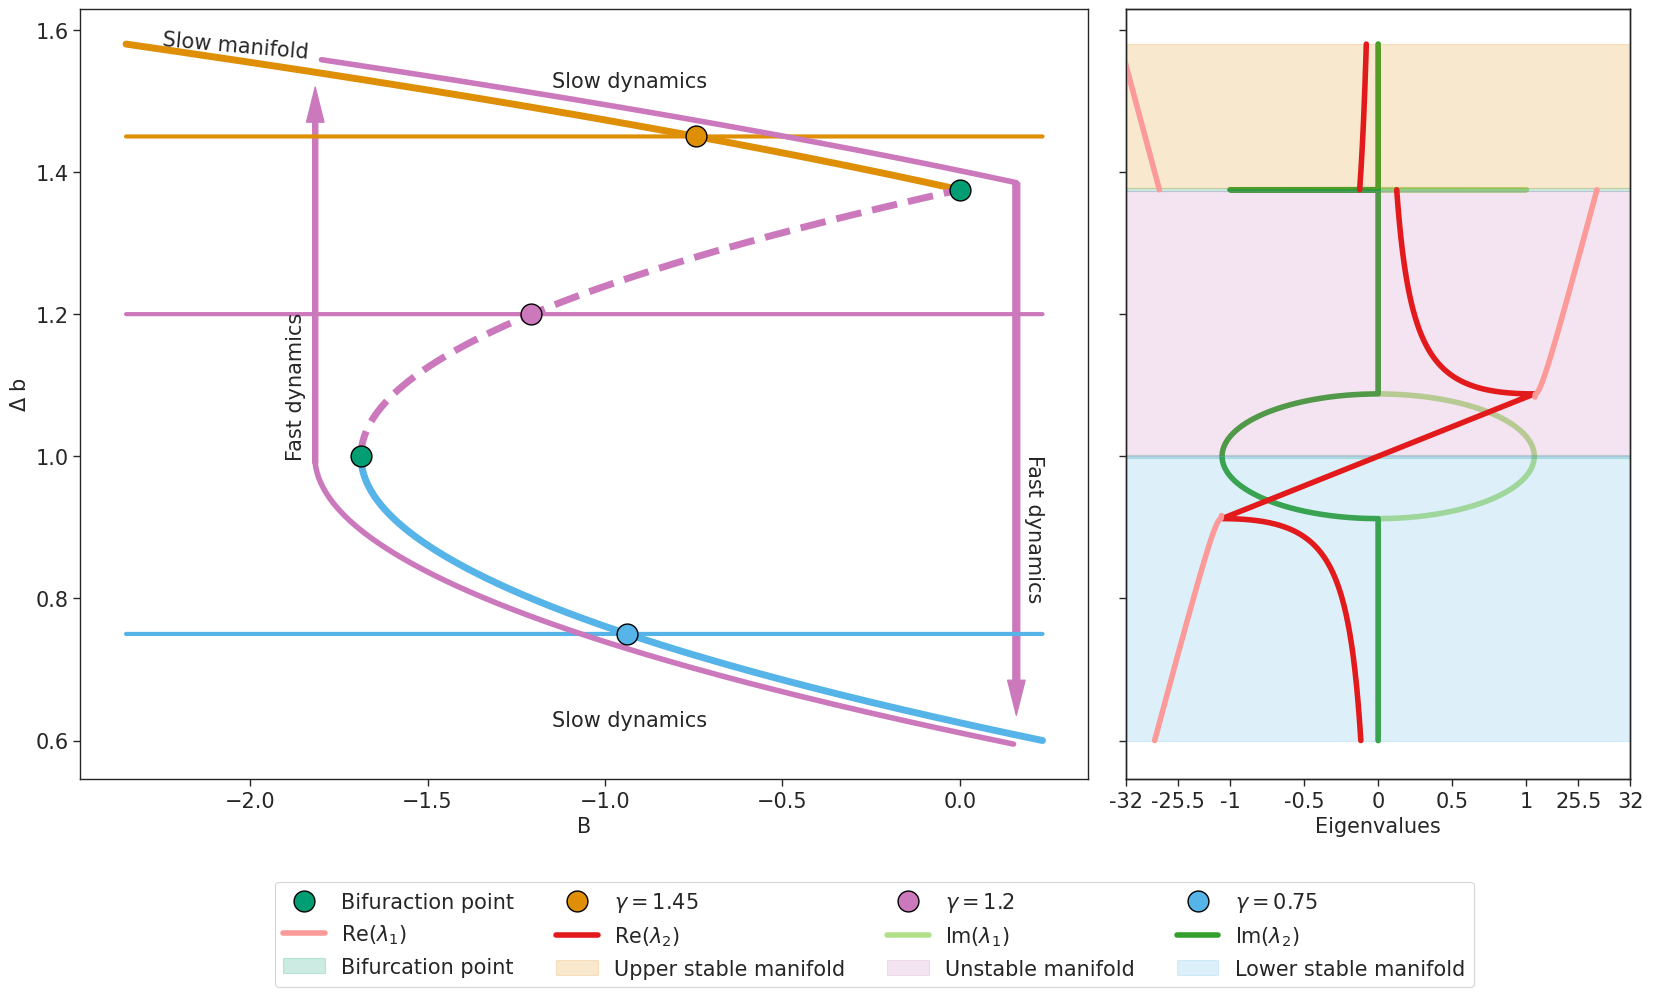

In [4]:
# set fig_stability and fig_manifold side by side with seaborn
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style("ticks")

N = 10_000
b_null = np.linspace(0.6, 1.58, N)

# increase the size of the figure
# make the left figure twice as big as the right one
fig, (ax_manifold, ax_stability)= plt.subplots(1, 2, 
    sharey=True, figsize=(20, 10), gridspec_kw={'width_ratios': [2, 1]})

# decrease the gap between the two figures
fig.subplots_adjust(wspace=0.05)

# increase all the text size
plt.rcParams.update({'font.size': 20, 'xtick.labelsize': 20, 
                'ytick.labelsize': 20, 'axes.labelsize': 20})
            

ax = ax_manifold
#get the colors from the seaborn color palette colorblind
colorblind = sns.color_palette("colorblind")

color_slow_manifold = 'black'
color_bifurcation = colorblind[2]             # muted green as in the paper
color_stable_fixpoint_above = colorblind[1]   # orange
color_stable_fixpoint_below = colorblind[-1]  # light blue
color_unstable_fixpoint = colorblind[4]       # purple



# plot the lower stable manifold
cuttoff_lower = np.argmin(np.abs(b_null - localminimum_b))
ax.plot( B_null[:cuttoff_lower], b_null[:cuttoff_lower], color=color_stable_fixpoint_below,
                linewidth=5)

# plot the upper stable manifold
cuttoff_upper = np.argmin(np.abs(b_null - discont_b))
ax.plot( B_null[cuttoff_upper:], b_null[cuttoff_upper:], color=color_stable_fixpoint_above,
                linewidth=5)

# plot the unstable manifold
ax.plot( B_null[cuttoff_lower:cuttoff_upper], b_null[cuttoff_lower:cuttoff_upper], color=color_unstable_fixpoint,
        linestyle='--', linewidth=5)


# make the bifurcation points a larger circle with a black outline
ax.plot( 0, discont_b,'o', color = color_bifurcation, markersize=15, 
                            markeredgecolor='black', zorder = 10)
ax.plot( localminimum_B, localminimum_b, 'o', label= 'Bifuraction point',
                            color = color_bifurcation, markersize=15,
                            markeredgecolor='black', zorder = 10)
print('lower bifurcation point: B = ', localminimum_B, '; b = ', localminimum_b)

def add_fixpoint_and_nullclines(gamma, alpha = 0, color = 'k'):
    B_null2 = np.linspace(np.min(B_null), np.max(B_null), N)
    b_null2 = gamma +0 * B_null2
    ax.plot( B_null2, b_null2, color = color, linewidth=3)
    
    intersect_index = np.argmin(np.abs(b_null2 - b_null))
    ax.plot( B_null[intersect_index], b_null[intersect_index], 'o', 
                label=r'$\gamma = $' + str(gamma),
                color = color, markersize=15, markeredgecolor='black', zorder = 10)

add_fixpoint_and_nullclines(1.45, color = color_stable_fixpoint_above)

# find mid point between the two bifurcation points in b
midpoint_b = (discont_b + localminimum_b)/2
add_fixpoint_and_nullclines(1.2, color = color_unstable_fixpoint)

add_fixpoint_and_nullclines(0.75, color = color_stable_fixpoint_below)

m = (discont_b - localminimum_b)/( - localminimum_B)
c = localminimum_b - m*localminimum_B

# plot the line
B_line = np.linspace(localminimum_B, 0, N)
b_line = m*B_line + c
print('the slope of the line, alpha, is: ', m)
print('the intersection of the line, gamma, is: ', c)
#plt.plot( B_line, b_line, label='line through bifurcation points', color='black')

plt.xlabel('B')
plt.ylabel('b')

# deinge variables for arrows
arrow_head_width = 0.05
arrow_head_length = 0.05

## add a shadow to the manifold from discontinuity to bifurcation point
# get the points on the line
shadow_dits_1 = 0.25
b_shadow_upper = np.linspace(discont_b +0.01, 1.558, N)
B_shadow_upper = - abs(q0 + q1*(b_shadow_upper - b0))*(b_shadow_upper - b0) + shadow_dits_1
ax.plot( B_shadow_upper, b_shadow_upper
            , color=color_unstable_fixpoint, linewidth=4)
# add an arrow from the end of the shadow to the slow manifold below
ax.arrow( B_shadow_upper[0], b_shadow_upper[0], 0, -0.7,
            head_width= arrow_head_length, head_length=arrow_head_width,
            fc=color_unstable_fixpoint, ec=color_unstable_fixpoint,
            width=0.02)

## add a shadow below the lower stable manifold from discontinuity to bifurcation point
# get the points on the line
b_shadow_lower = np.linspace(np.min(b_null)-0.005, 1 - 0.01, N)
B_shadow_lower = - abs(q0 + q1*(b_shadow_lower - b0))*(b_shadow_lower - b0) - shadow_dits_1+0.12
ax.plot( B_shadow_lower, b_shadow_lower
            , color=color_unstable_fixpoint, linewidth=4)
# add an arrow from the end of the shadow to the slow manifold above
ax.arrow( B_shadow_lower[-1], b_shadow_lower[-1], 0, 0.48,
            head_width= arrow_head_length, head_length=arrow_head_width,
            fc=color_unstable_fixpoint, ec=color_unstable_fixpoint,
            width=0.015)

### ADD TEXT ###
# add the text fast dynamics using seaborn
ax.text( 0.18, 0.8, 'Fast dynamics', fontsize = 15, rotation=-90)
ax.text( -1.9, 1, 'Fast dynamics', fontsize = 15, rotation=90)

# add the text slow dynamics using seaborn
ax.text( -1.15, 1.52, 'Slow dynamics', fontsize=15)
ax.text( -1.15, 0.62, 'Slow dynamics', fontsize=15)

# add the text slow manifold using seaborn
ax.text( -2.25, 1.56, 'Slow manifold', fontsize=15, rotation=-5)

ax.set_xlabel('B', fontsize=15)
ax.set_ylabel(r'$\Delta$ b', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)

handles1, labels1 = ax.get_legend_handles_labels()


ax = ax_stability

ax2 = ax.twiny()


#translation_factor = 17.92
translation_factor = 18.9

## use sns.color_palette("Paired") to get the colors for the eigenvalues
# make the real parts red and the imaginary parts green

eigenvalues_color_palette = sns.color_palette("Paired")

color_imag_1 = eigenvalues_color_palette[2]
color_imag_2 = eigenvalues_color_palette[3]

color_real_1 = eigenvalues_color_palette[4]
color_real_2 = eigenvalues_color_palette[5]


mask1 = (eigenvalues_tot.real[:,0]>1)
mask2 = (eigenvalues_tot.real[:,0]<-1)
mask = mask1 + mask2


# plot the real part of the second eigenvalue before the discontinuity
pre_discont_mask = b_tot < discont_b
post_discont_mask = b_tot > discont_b

ax2.plot( eigenvalues_tot.real[:,0][mask1]+translation_factor, b_tot[mask1],
          color = color_real_1, label = r'Re$(\lambda_1)$', linewidth=4)

#divide maks2 into two parts before and after the discontinuity
mask2_pre = mask2 * pre_discont_mask
mask2_post = mask2 * post_discont_mask


ax2.plot( eigenvalues_tot.real[:,0][mask2_pre]-translation_factor, b_tot[mask2_pre],
          color = color_real_1, markersize=0.1, linewidth=4)
ax2.plot( eigenvalues_tot.real[:,0][mask2_post]-translation_factor, b_tot[mask2_post],
                color = color_real_1, markersize=0.1, linewidth=4)
#ax2.plot( eigenvalues_tot.real[:,0][~mask], b_tot[~mask], '.', 
#                color = color_real_1,zorder = 2, markersize=0.1)

ax.plot( eigenvalues_tot.real[:,1][pre_discont_mask], b_tot[pre_discont_mask],
                 color = color_real_2, label = r'Re$(\lambda_2)$', linewidth=4)
# plot the real part of the second eigenvalue after the discontinuity
ax.plot( eigenvalues_tot.real[:,1][post_discont_mask], b_tot[post_discont_mask],
                        color = color_real_2, linewidth=4)

#ax.plot(eigenvalues_tot.real[:,1], b_tot, '.', color = color_real_2, 
#        label = 'real part of eigenvalue 2',zorder=1, markersize=0.1)




ax.plot(eigenvalues_tot.imag[:,0], b_tot, color = color_imag_1, 
        label = r'Im$(\lambda_1)$', markersize=0.1, zorder=0, linewidth=4)
ax.plot(eigenvalues_tot.imag[:,1], b_tot, color = color_imag_2, 
        label = r'Im$(\lambda_2)$', markersize=0.1, zorder=0, linewidth=4)


max_ax2 = 32
ax2.set_xlim(-max_ax2, max_ax2)
ax2.set_xticks(np.arange(-max_ax2, max_ax2+1, 2.5))
ax.set_xlim(-1.7,1.7)
ax.set_xticks([ -1.7,-1.35, -1,-0.5, 0,0.5, 1, 1.35, 1.7])
ax.set_xticklabels([-32,-25.5, -1,-0.5,0,0.5,1, 25.5, 32])

#hide ax2 ticks and marks
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=False, labelright=False)

# remove y label 
ax.set_ylabel('')
# axvspan when imaginary part is non zero color = green only on ax y [-1,1] with a gradient in alpha from 0 to 1 to 0

ax.axhspan(discont_b-0.002, discont_b+0.002, alpha=0.2, color= color_bifurcation,
                 label = 'Bifurcation point')

mask = (eigenvalues_tot.imag[:,0]!=0)
ax.axhspan(1-0.002, 1+0.002, alpha=0.2, color=color_bifurcation)

ax.axhspan(1+.0002, b_tot[mask][-1]-0.002, alpha=0.2, 
        color= color_unstable_fixpoint,
            label = 'Unstable manifold')

ax.axhspan(np.min(b_null), 1-.0003, alpha=0.2, color= color_stable_fixpoint_below,
            label = 'Lower stable manifold')

ax.axhspan(b_tot[mask][-1]+0.002, np.max(b_null), alpha=0.2, color= color_stable_fixpoint_above,
            label = 'Upper stable manifold')

ax.set_xlabel('Eigenvalues', fontsize=15)

# increse the tick size
ax.tick_params(axis='both', which='major', labelsize=15)

# make a legend for both plots
handles2, labels2 = ax.get_legend_handles_labels()
handles3, labels3 = ax2.get_legend_handles_labels()

handles = handles1 + handles2 + handles3
labels  = labels1  + labels2  + labels3


## waeve the handles and labels to make the legend look nice 
# make the 2 to the 5th element the first element
# move the last element to the 5th positi



handles_tot = [handles[0], handles[4], handles[8]]
labels_tot = [labels[0], labels[4], labels[8]]

for i in range(1,len(handles1)):
        handles_tot += [handles[i], handles[i+3], handles[i+7]]
        labels_tot += [labels[i], labels[i+3], labels[i+7]]

handles_tot[1] = handles[-1]
labels_tot[1] = labels[-1]

labels_tot[2] = labels[-5]
handles_tot[2] = handles[-5]

# switch the 6th and 9th element
handles_tot[5], handles_tot[8] = handles_tot[8], handles_tot[5]
labels_tot[5], labels_tot[8] = labels_tot[8], labels_tot[5]

#switch the 6th and 12th element
handles_tot[5], handles_tot[11] = handles_tot[11], handles_tot[5]
labels_tot[5], labels_tot[11] = labels_tot[11], labels_tot[5]


# make a legend in 4 columns below the plot
ax.legend(handles_tot, labels_tot, loc='upper center', bbox_to_anchor=(-.5, -0.12),ncol=4, fontsize=15)
#ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=1, fontsize=20)


#plt.savefig('../../../Figures/Bachelor_project/stability_diagram_no_incline.pdf', bbox_inches='tight')


## plots with inclanation of manifold

In [11]:
def add_fixpoint_and_nullclines(ax,gamma, alpha = -0.35, color = 'k'):
        B_null2 = np.linspace(np.min(B_null), np.max(B_null), N)
        b_null2 = gamma - alpha * B_null2

        print(gamma)
        print(alpha)
        intersections = np.argwhere(np.diff(np.sign(B_null + (b_null-gamma)/alpha))).flatten()
        print(intersections)
        if len(intersections) == 3:     
                for point in intersections:
                        if b_null[point] > discont_b:
                                color_point = color_stable_fixpoint_above
                        elif b_null[point] < localminimum_b:
                                color_point = color_stable_fixpoint_below
                        else:
                                color_point = color_unstable_fixpoint

                        ax.plot( B_null[point], b_null[point], 'o', 
                        label=r'$\gamma = $' + str(gamma) + ' intersection', 
                        color = color_point, markersize=15, markeredgecolor='black')
                
                ax.plot( B_null2, b_null2, label=r'$\gamma = $' + str(gamma), 
                color = color, linewidth=3, linestyle='--')
        
        else:
                ax.plot( B_null[intersections], b_null[intersections], 'o', 
                        label=r'$\gamma = $' + str(gamma) + ' intersection', 
                        color = color, markersize=15, markeredgecolor='black')
                ax.plot( B_null2, b_null2, label=r'$\gamma = $' + str(gamma), 
                color = color, linewidth=3)

In [6]:
def eigenvalues_plot(alpha,ax):
    # make a list of all the eigenvalues from discont_b to 2
    N = 10000

    b_1 = np.linspace(discont_b, np.max(b_null), N)
    eigenvalues_1 = np.zeros((N,2), dtype = complex)
    for i in range(N):
        A = np.array([[2*q1*(b0 - b_1[i])-q0, 1/tau ], [-1, alpha/tau]])
        eigenvalues_1[i,:] = np.linalg.eig(A)[0]


    b = discont_b
    A = np.array([[0, 1/tau ], [-1, alpha/tau]])  # b equal to discont_b
    eig_discont_b = np.linalg.eig(A)[0]


    # make a list of all the eigenvalues from 0.5 to discont_b
    b_2 = np.linspace(np.min(b_null), discont_b, N)
    eigenvalues_2 = np.zeros((N,2), dtype=complex)
    for i in range(N):
        A = np.array([[-1*(2*q1*(b0 - b_2[i])-q0), 1/tau ], [-1, alpha/tau]])
        eigenvalues_2[i,:] = np.linalg.eig(A)[0]

    b_tot = (b_2, np.array([b]), b_1)
    eigenvalues_tot = (eigenvalues_2, np.array([eig_discont_b]), eigenvalues_1)


    # plot the eigenvalues
    for i in range(len(b_tot)):
        if i != 1:
            style = '-'

        else:
            style = '.'
        ax.plot(eigenvalues_tot[i][:,0].real, b_tot[i], style, linewidth=3, label=r'Re $\lambda_1$',color=color_real_1)
        ax.plot(eigenvalues_tot[i][:,1].real, b_tot[i], style, linewidth=3, label=r'Re $\lambda_2$',color=color_real_2)
        ax.plot(eigenvalues_tot[i][:,0].imag, b_tot[i], style, linewidth=3, label=r'Im $\lambda_1$',color=color_imag_1)
        ax.plot(eigenvalues_tot[i][:,1].imag, b_tot[i], style, linewidth=3, label=r'Im $\lambda_2$',color=color_imag_2)


    ax.set_title(r'$\alpha = $' + str(alpha), fontsize=20)
    return ax




In [12]:
def generate_left_plot(ax):
    b0, q0, q1, tau, Bbar, eta, gammabar = 0.625, -9., 12., 0.902, 3.4164, 0.5, 1.22

    gamma = 1.2
    alpha = -0.8

    N = 10_000
    b_null = np.linspace(0.6, 1.58, N)
    B_null = - abs(q0 + q1*(b_null - b0))*(b_null - b0)


    discont_b = -q0/q1 + b0

    localminimum_b = (2*q1 *b0 - q0)/(2*q1)
    localminimum_B = - abs(q0 + q1*(localminimum_b - b0))*(localminimum_b - b0)

    # plot the lower stable manifold
    cuttoff_lower = np.argmin(np.abs(b_null - localminimum_b))
    ax.plot( B_null[:cuttoff_lower], b_null[:cuttoff_lower], color=color_stable_fixpoint_below,
                    linewidth=5)

    # plot the upper stable manifold
    cuttoff_upper = np.argmin(np.abs(b_null - discont_b))
    ax.plot( B_null[cuttoff_upper:], b_null[cuttoff_upper:], color=color_stable_fixpoint_above,
                    linewidth=5)

    # plot the unstable manifold
    ax.plot( B_null[cuttoff_lower:cuttoff_upper], b_null[cuttoff_lower:cuttoff_upper], color=color_unstable_fixpoint,
            linestyle='--', linewidth=5)


    # make the bifurcation points a larger circle with a black outline
    #plt.plot( 0, discont_b,'o', color = color_bifurcation, markersize=15, 
    #                            markeredgecolor='black')
    ax.plot( localminimum_B, localminimum_b, 'o', label= 'Bifuraction point',
                                color = color_bifurcation, markersize=15,
                                markeredgecolor='black')

    add_fixpoint_and_nullclines(ax, 1.75, color = color_stable_fixpoint_above)
    add_fixpoint_and_nullclines(ax, 1.5, color = color_meta_stable_fixpoint)

    add_fixpoint_and_nullclines(ax, 1.25, color = color_stable_fixpoint_below)


    m = (discont_b - localminimum_b)/( - localminimum_B)
    c = localminimum_b - m*localminimum_B

    # plot the line
    B_line = np.linspace(localminimum_B, 0, N)
    b_line = m*B_line + c
    print('the slope of the line, alpha, is: ', m)
    print('the intersection of the line, gamma, is: ', c)
    #plt.plot( B_line, b_line, label='line through bifurcation points', color='black')

    ax.set_xlabel('B')
    ax.set_ylabel(r'$\Delta$ b')

    # deinge variables for arrows
    arrow_head_width = 0.05
    arrow_head_length = 0.05

    ## add a shadow to the manifold from discontinuity to bifurcation point
    # get the points on the line
    shadow_dits_1 = 0.25
    b_shadow_upper = np.linspace(discont_b +0.01, 1.558, N)
    B_shadow_upper = - abs(q0 + q1*(b_shadow_upper - b0))*(b_shadow_upper - b0) + shadow_dits_1
    ax.plot( B_shadow_upper, b_shadow_upper
                , color=color_unstable_fixpoint, linewidth=4)
    # add an arrow from the end of the shadow to the slow manifold below
    plt.arrow( B_shadow_upper[0], b_shadow_upper[0], 0, -0.7,
                head_width= arrow_head_length, head_length=arrow_head_width,
                fc=color_unstable_fixpoint, ec=color_unstable_fixpoint,
                width=0.02)


    ## add a shadow below the lower stable manifold from discontinuity to bifurcation point
    # get the points on the line
    b_shadow_lower = np.linspace(np.min(b_null)-0.005, 1 - 0.01, N)
    B_shadow_lower = - abs(q0 + q1*(b_shadow_lower - b0))*(b_shadow_lower - b0) - shadow_dits_1+0.12
    ax.plot( B_shadow_lower, b_shadow_lower
                , color=color_unstable_fixpoint, linewidth=4)
    # add an arrow from the end of the shadow to the slow manifold above
    plt.arrow( B_shadow_lower[-1], b_shadow_lower[-1], 0, 0.48,
                head_width= arrow_head_length, head_length=arrow_head_width,
                fc=color_unstable_fixpoint, ec=color_unstable_fixpoint,
                width=0.015)

    ## add a gradianet from the bifurcation point to the discontinuity in the b axis
    #  from min(B) to max(B) in the B axis color = color_unstable_fixpoint
    #  with a gradiant in alpha from 0 to 1 to 0

    # make a grid of points in the above range 
    B_grad = np.linspace(np.min(B_null), np.max(B_null), N)
    b_grad = np.linspace(localminimum_b, discont_b, N)
    B_grad, b_grad = np.meshgrid(B_grad, b_grad)

    # make a gradiant in alpha from 0 to 1 to 0
    alpha_grad = np.linspace(0, 1, N//2)
    alpha_grad = np.concatenate((alpha_grad, np.flip(alpha_grad)))
    # make alpha_grad the same shape as B_grad and b_grad 

    ### ADD TEXT ###
    # add the text fast dynamics using seaborn
    #plt.text( 0.18, 0.8, 'Fast dynamics', fontsize=20, rotation=-90)
    #plt.text( -1.9, 1.22, 'Fast dynamics', fontsize=20, rotation=90)

    # add the text slow dynamics using seaborn
    #plt.text( -1.35, 1.55, 'Slow dynamics', fontsize=20)
    #plt.text( -1.15, 0.62, 'Slow dynamics', fontsize=20)
    ax.set_ylim(0.5, 1.6)



    #plt.legend(handles_tot, labels_tot, loc='upper center', bbox_to_anchor=(1, -0.14),ncol=4, fontsize=15)
    pass



In [13]:

def generate_right_plot(ax):

        alphas = np.array([-1.8,-0.35,0.35,1.8])
        for i in range(len(ax)):
                eigenvalues_plot(alphas[i],ax[i])

        ax[0].set_ylabel(r'$\Delta b$', fontsize=20)
        ax[2].set_ylabel(r'$\Delta b$', fontsize=20)

        ax[-1].set_xlabel('Eigenvalues', fontsize=20)
        ax[-2].set_xlabel('Eigenvalues', fontsize=20)

        # make a legend with 4 columns under the plot
        #ax[3].legend(loc='lower center', bbox_to_anchor=(-0.1, -0.3), ncol=4, fontsize=20)





        ax[0].axhspan(1+.02, b_tot[mask][-1]-0.002, alpha=0.2, 
                color= color_unstable_fixpoint)
                

        ax[0].axhspan(np.min(b_null), 1+0.02-.0003, alpha=0.2, color= color_stable_fixpoint_below)
                

        ax[0].axhspan(b_tot[mask][-1]+0.002, np.max(b_null), alpha=0.2, 
        color= color_stable_fixpoint_above)

                


        ax[1].axhspan(1-0.002, 1+0.005, alpha=0.2, color=color_bifurcation)

        ax[1].axhspan(1+0.006, b_tot[mask][-1]-0.002, alpha=0.2,
                color= color_unstable_fixpoint)
                


        ax[1].axhspan(np.min(b_null), 1-.0003, alpha=0.2, 
        color= color_stable_fixpoint_below)
                

        ax[1].axhspan(b_tot[mask][-1]+0.002, np.max(b_null), alpha=0.2, 
        color= color_stable_fixpoint_above)
                

        ax[2].axhspan(1+0.012, np.max(b_null), alpha=0.2,
                color= color_unstable_fixpoint)
                

        ax[2].axhspan(1+0.005, 1+0.01, alpha=0.2, color=color_bifurcation)

        ax[2].axhspan(np.min(b_null),0.87, alpha=0.2,
                color= color_unstable_fixpoint)
                

        ax[2].axhspan(0.87, 1+0.004, alpha=0.2,
                color= color_stable_fixpoint_below)


        ax[3].axhspan(np.min(b_null), np.max(b_null),
                alpha=0.2, color= color_unstable_fixpoint)

        pass
                

1.75
-0.35
[8757]
1.5
-0.35
[3366 7225 8205]
1.25
-0.35
[2146]
the slope of the line, alpha, is:  0.2222222222222222
the intersection of the line, gamma, is:  1.375


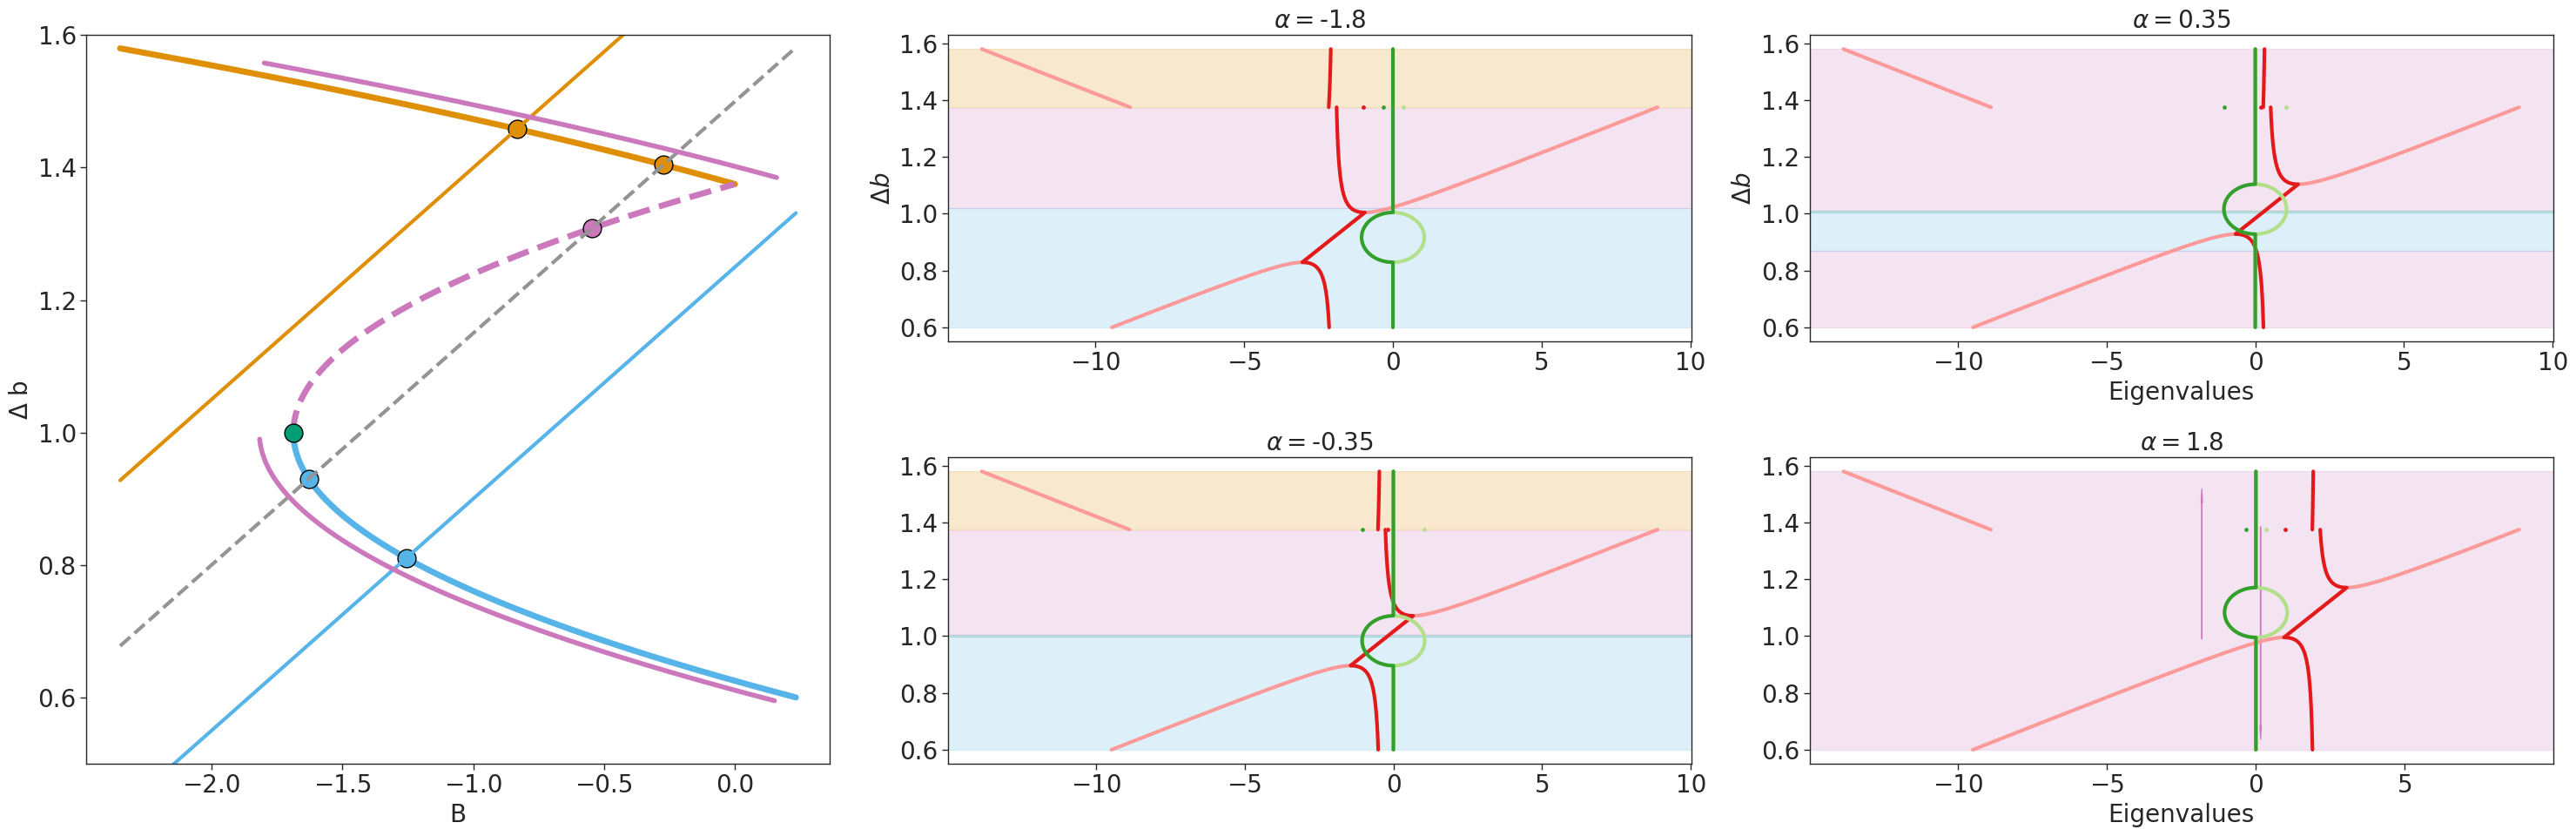

In [15]:
from matplotlib.gridspec import GridSpec



# Create the figure
fig = plt.figure(figsize=(30, 10))

# Create the gridspec structure, in this case 3x2 grid
gs = GridSpec(2, 3, figure=fig)

# Add subplots 
ax0 = fig.add_subplot(gs[:, 0])  # First column span all rows
ax1 = fig.add_subplot(gs[0, 1])  # First row, second column
ax2 = fig.add_subplot(gs[1, 1])  # Second row, second column
ax3 = fig.add_subplot(gs[0, 2])  # First row, third column
ax4 = fig.add_subplot(gs[1, 2])  # Second row, third column

generate_left_plot(ax0)

# draw the second plot on ax2
generate_right_plot(np.array([ax1,ax2,ax3,ax4]))


plt.tight_layout()
plt.show()
